1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

I limited it to only 10 thallium left because after that it can take a lot of time, resulting in a graph that doesn't show anything intersting


<function matplotlib.pyplot.show(close=None, block=None)>

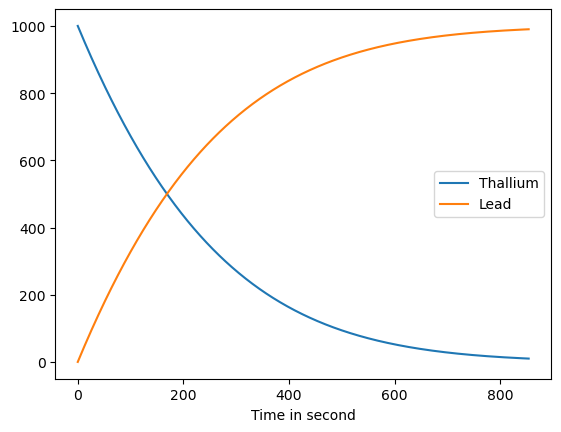

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize,integrate, stats
import random
import math

thallium_number = 1000
lead_number = 0
time = 1000
half_time= 3052*60
list_tl= [1000]
list_ld= [0]

def decay_probability(time):
    p = 1 - (2**(-time/half_time))
    return p

def decay_one_second(thallium,time):
    p = decay_probability(time)
    thallium_decayed = thallium*p
    return thallium_decayed
   
while thallium_number > 10 :
    thallium_decayed = decay_one_second(thallium_number,time)
    thallium_number = thallium_number - thallium_decayed
    lead_number = lead_number + thallium_decayed
    list_tl.append(thallium_number)
    list_ld.append(lead_number)    
    time +=1

plt.plot(list_tl,label="Thallium")
plt.plot(list_ld,label="Lead")
plt.xlabel("Time in second")
plt.legend()
print("I limited it to only 10 thallium left because after that it can take a lot of time, resulting in a graph that doesn't show anything intersting")

plt.show

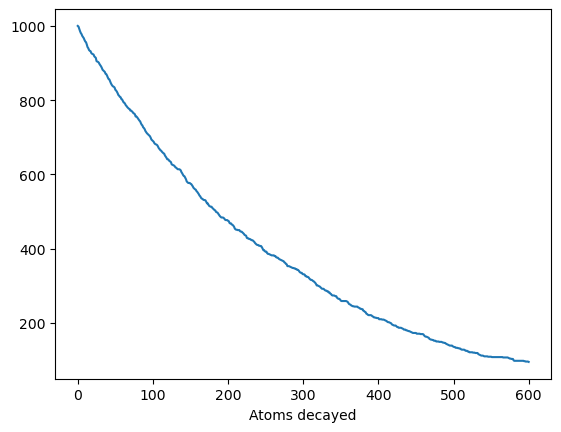

In [97]:

initial_thallium_number = 1000
total_time = 600

def inverse_transform_method(n, half_life):
    u = np.random.rand(n)
    times_of_decay = -half_life * np.log(1 - u) / np.log(2)
    return np.sort(times_of_decay)

def total_decay(initial_tl, half_life, total_time):
    time_steps = np.arange(0, total_time + 1, 1) 
    tl_not_decayed = [initial_tl]
    decay_times = inverse_transform_method(initial_tl, half_life)
    for time in time_steps[1:]:
        tl_not_decayed.append(np.sum(decay_times > time))
    return time_steps, tl_not_decayed

t, tl_not_decayed= total_decay(initial_thallium_number, half_life, total_time)

plt.plot(t, tl_not_decayed)
plt.xlabel('Time in second')
plt.xlabel('Atoms decayed')
plt.show()


2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

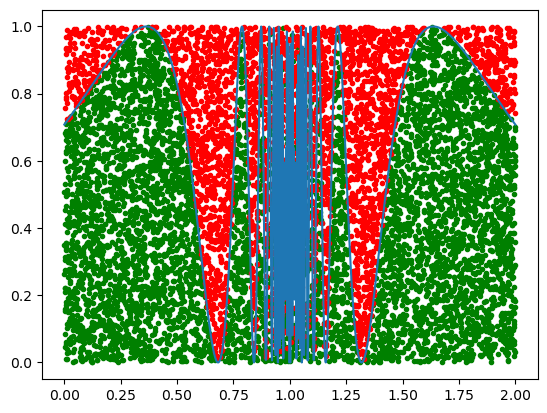

MC Integration 1.3438
Error: 0.004695214478594136


In [98]:
def f(x):
    return np.sin(1 / (1 - x))**2
    
N = 10000

x_random = np.random.uniform(0, 2, N)
y_random = np.random.uniform(0, 1, N)
under_curve = y_random < f(x_random)
integral_estimate = (under_curve.sum() / N) * (2 - 0)


x_values = np.linspace(0, 2, 1000)
plt.plot(x_values, f(x_values), label='f(x)')
plt.scatter(x_random[under_curve], y_random[under_curve], color='green', marker='.')
plt.scatter(x_random[~under_curve], y_random[~under_curve], color='red', marker='.')
plt.show()

integral_std = np.std(under_curve) / np.sqrt(N)

print("MC Integration",integral_estimate)
print("Error:",integral_std)


3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [99]:
N = 100000
def f(x, y):
    if x**2 + y**2 <= 1: return 1
    else: return 0

def MC_circle(N):
    inside_circle = 0
    for _ in range(N):
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)
        inside_circle += f(x, y) #if inside circle, we add 1
    total_area = 4.0
    circle_area_estimate = inside_circle / N * total_area
    return circle_area_estimate

result = MC_circle(N)

print("Area circle:",result)
print("Not that accurate")

Area circle: 3.14232
Not that accurate


In [100]:

def f(*args):
    if sum(x**2 for x in args) <= 1:
        return 1
    else:
        return 0

def MC_sphere(N):
    inside_sphere = 0
    for _ in range(N):
        point = [random.uniform(-1, 1) for _ in range(10)]
        inside_sphere += f(*point)
    total_volume = 2.0**10
    sphere_volume_estimate = inside_sphere / N * total_volume
    return sphere_volume_estimate

result_sphere = MC_sphere(N)

print("Volume 10D sphere:", result_sphere)


Volume 10D sphere: 2.84672


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [101]:
def f(x):
    return x**(-1/2) / (np.exp(x) + 1)

def w(x):
    return 1 / np.sqrt(x)

n = 10000
samples = stats.expon(loc=0).rvs(n)
y_val = f(samples)
w_val = w(samples)
w_int = scipy.integrate.quad(w,0,1)

h_is = 1.0 / n * (np.sum(y_val /w_val)) * w_int[0]

print("Importance Sampling integral:", h_is)

Importance Sampling integral: 0.6117594772324387
